Data Preparation:

In [3]:
import pandas as pd
df = pd.read_excel(r'/content/US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
df.info() # no column with empty data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
df.describe() #we can see numerical columns

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows) #no duplicated raws

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]


In [12]:
df.drop_duplicates(inplace=True)

In [11]:
print(df.isnull().sum()) # no missing values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [10]:
missing_data = df.columns[df.isnull().any()].tolist()
print(missing_data) # no missing data

[]


2. Data Visualization:

In [13]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [14]:
df['Year'] = df['Order Date'].dt.year #extract year

In [17]:
df['Year'].unique() #check which years we have

array([2016, 2015, 2014, 2017])

In [19]:
#An interactive line chart to show sales trends over the years.
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index() #aggregate sales by year

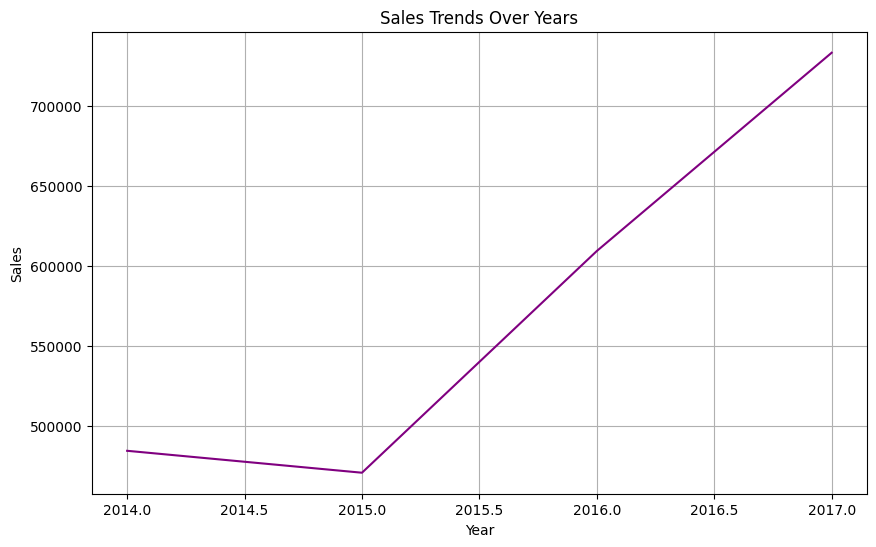

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_year, x='Year', y='Sales', color = 'purple')
plt.title('Sales Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

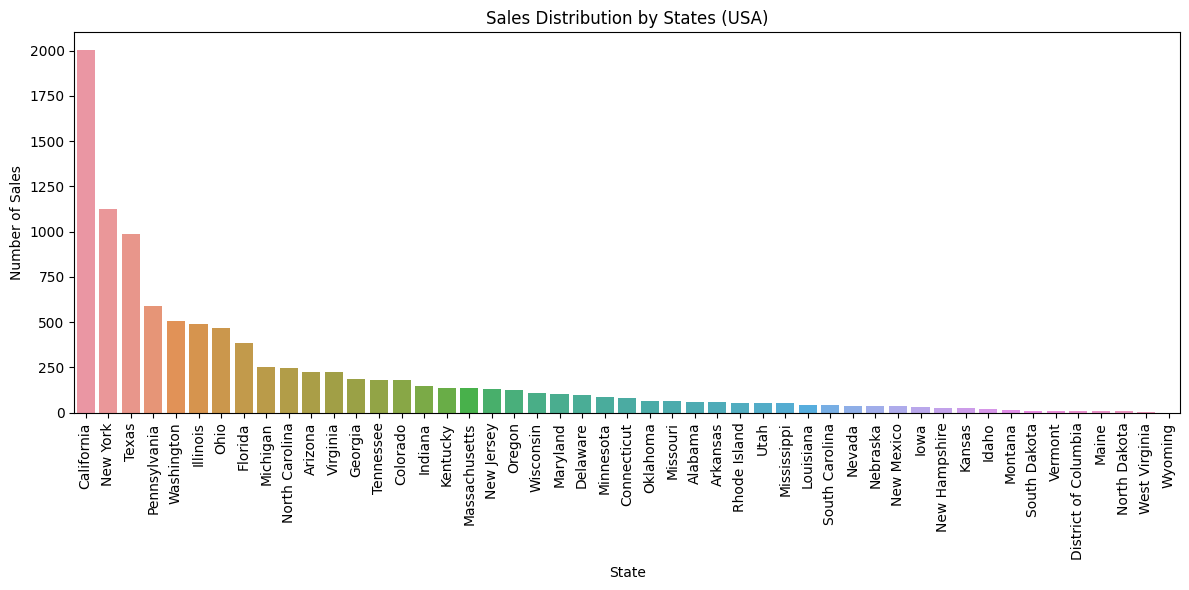

In [26]:
#An interactive map to visualize sales distribution by states
data_by_states = df[df['Country'] == 'United States']

plt.figure(figsize=(12, 6))
sns.countplot(data=data_by_states, x='State', order=data_by_states['State'].value_counts().index)
plt.title('Sales Distribution by States (USA)')
plt.xlabel('State')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3. Data Visualization

In [27]:
#A bar chart showing top 10 products by sales
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()

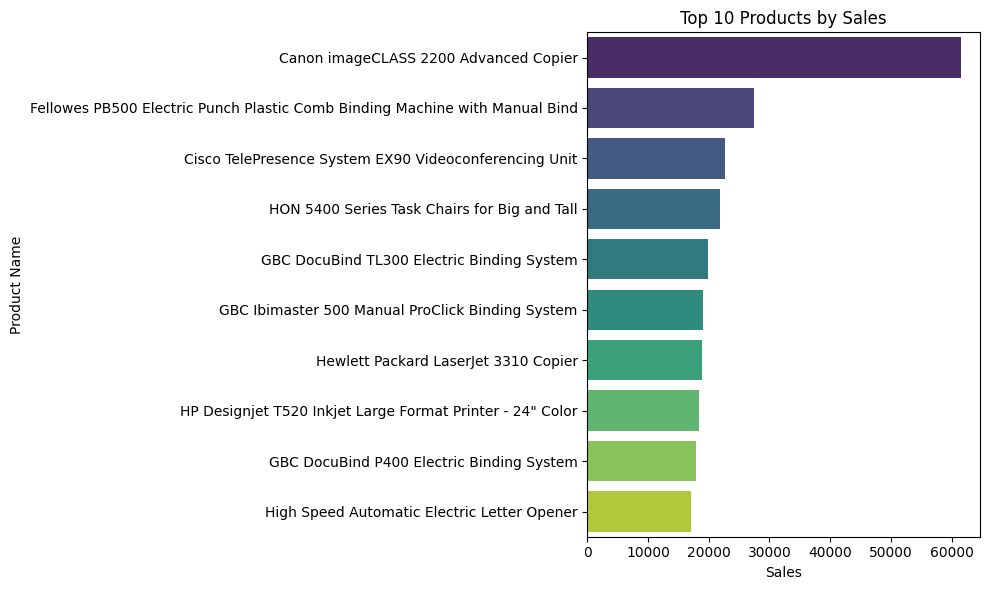

In [28]:
plt.figure(figsize =(10,6))
sns.barplot(data=top_products, x='Sales', y='Product Name', palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

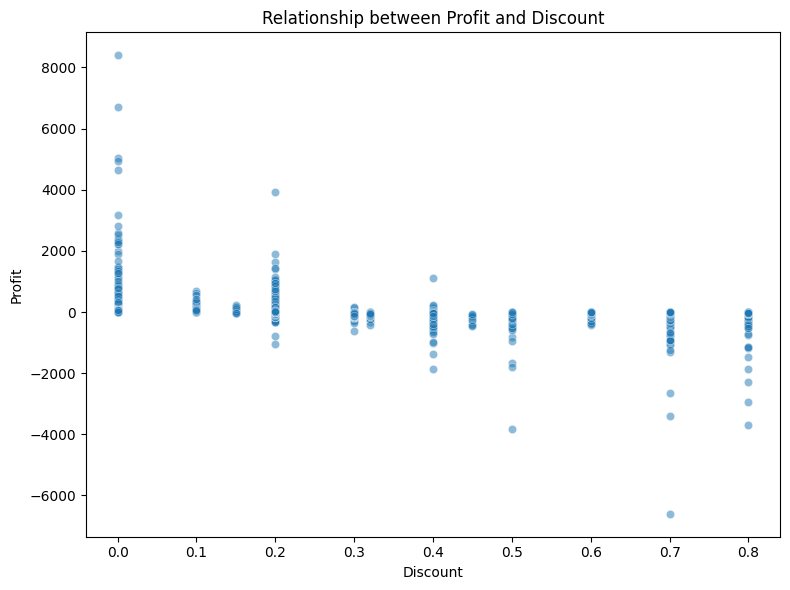

In [29]:
# A scatter plot to analyze the relationship between profit and discount.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5)
plt.title('Relationship between Profit and Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()